# 0. Loading packages and dataset

In [117]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

df = pd.read_csv('diabetes_cleaned.csv')

C:\Users\Kelvi\AppData\Local\Temp\ipykernel_19800\3133043719.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# 1. Take a look at the data

1. Dimensions

In [118]:
df.shape

(768, 9)

2. first rows

In [119]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.000000,113.0,80.0,2.833213,4.836282,31.0,0.628075,3.091042,0
1,1.386294,180.0,64.0,3.258097,4.262680,34.0,0.239804,3.295837,0
2,2.079442,114.0,64.0,3.401197,4.836282,27.4,0.549277,3.555348,1
3,0.693147,125.0,50.0,3.713572,5.123964,33.3,0.673964,3.367296,1
4,1.098612,120.0,76.0,3.637586,4.663439,39.7,0.194744,3.401197,0


3. data types

In [120]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI   
0       0.000000    113.0           80.0       2.833213  4.836282  31.0  \
1       1.386294    180.0           64.0       3.258097  4.262680  34.0   
2       2.079442    114.0           64.0       3.401197  4.836282  27.4   
3       0.693147    125.0           50.0       3.713572  5.123964  33.3   
4       1.098612    120.0           76.0       3.637586  4.663439  39.7   
..           ...      ...            ...            ...       ...   ...   
763     0.000000     84.0           64.0       3.135494  4.204693  35.8   
764     1.945910    103.0           72.0       3.496508  5.252273  37.7   
765     2.197225    176.0           90.0       3.555348  5.707110  33.7   
766     0.000000    161.0           50.0       3.401197  4.836282  21.9   
767     1.791759    117.0           86.0       3.433987  4.663439  39.1   

     DiabetesPedigreeFunction       Age  Outcome  
0               

4. Distribution of the outcome

In [121]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# 2 Train/val/test-split and standardisation


1. Splitting the data

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.2, random_state=1234)



2. Standardize

In [123]:
num_feat = df.columns[0:8]
scaler = StandardScaler()
X_train_stand = X_train.copy()
X_trainval_stand = X_trainval.copy()
X_val_stand = X_val.copy()
X_test_stand = X_test.copy()

X_train_stand[num_feat] = scaler.fit_transform(X_train_stand[num_feat])
X_val_stand[num_feat] = scaler.transform(X_val_stand[num_feat])
X_trainval_stand[num_feat] = scaler.transform(X_trainval_stand[num_feat])
X_test_stand[num_feat] = scaler.transform(X_test_stand[num_feat])

# 3. Logistic regression
 ## 3.1 Basic model
    

1. Train a logistic model

In [124]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10000, max_iter=200) 
logreg.fit(X_train_stand, y_train)

LogisticRegression(C=10000, max_iter=200)

2. Test both the train and validation dataset

In [125]:
print(logreg.score(X_train_stand, y_train))
print(logreg.score(X_val_stand, y_val))

0.7759674134419552
0.7886178861788617


3. Evaluate the model

In [126]:
# predict the outcomes for the test dataset
y_val_pred = logreg.predict(X_val_stand)
y_val_pred_prob = logreg.predict_proba(X_val_stand)

In [127]:
# construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_val_pred)
print(confusion_matrix)



[[78 12]
 [14 19]]


In [128]:
# print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86        90
           1       0.61      0.58      0.59        33

    accuracy                           0.79       123
   macro avg       0.73      0.72      0.73       123
weighted avg       0.78      0.79      0.79       123



In [129]:
print(y_val_pred_prob[:,1])

[0.62778674 0.42674582 0.72297924 0.18327337 0.64830856 0.30871939
 0.8751174  0.11891141 0.05145185 0.10767936 0.7177388  0.88722054
 0.26348683 0.29435227 0.76999468 0.03012965 0.25221799 0.08367416
 0.14037975 0.4591713  0.16594643 0.30498984 0.18805629 0.34078512
 0.0408915  0.24180379 0.3273449  0.7092774  0.58685752 0.18034312
 0.73287254 0.07259439 0.28955257 0.93466027 0.87223478 0.39254834
 0.53507502 0.88082443 0.95113905 0.18624364 0.58471233 0.44314795
 0.02673453 0.4723997  0.88147076 0.40321464 0.29248983 0.3887778
 0.36364549 0.45908722 0.32866791 0.1365629  0.08356934 0.97439195
 0.03031778 0.12869527 0.74787482 0.64592921 0.22541083 0.37258648
 0.15278596 0.68969705 0.03793306 0.53092174 0.22229631 0.5097018
 0.24687849 0.13963133 0.32767432 0.07375156 0.0638675  0.04728218
 0.80062727 0.01703195 0.8377725  0.17368281 0.15772548 0.46396973
 0.48691473 0.0325105  0.01718206 0.24134859 0.48759901 0.42654782
 0.10929832 0.16026174 0.36371654 0.35497194 0.52547536 0.081163

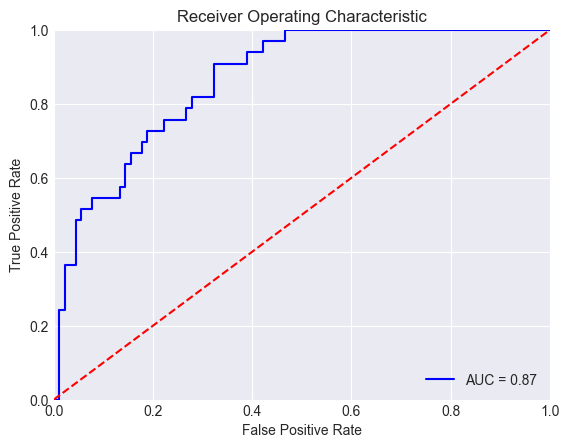

In [130]:
# print the ROC-curve
import sklearn.metrics as metrics
preds = y_val_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 3.2. Calibration
1. Check if the model is well calibrated, using the validation set
2. Do an isotonic calibration (even if the original model is already calibrated well).
3. Re-evaluate the model: Did the calibration have a large effect on the performance of the model? Can you explain why (not)?
4. No redo the entire thing: fit and calibrate the model at the same time, using CalibratedClassifierCV (use CV=3). Be careful to use the right dataset! Also evaluate this model.


 1. Check the calibration

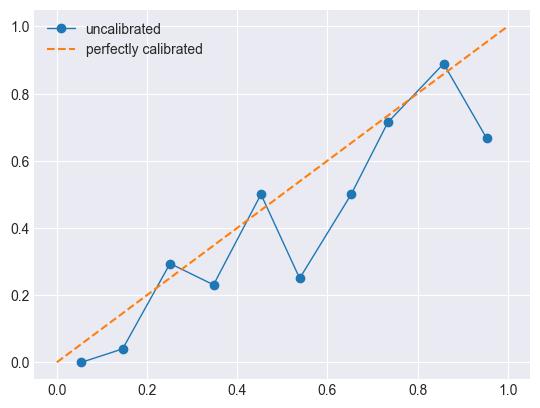

In [131]:
from sklearn.calibration import calibration_curve
y_pred_val_prob = logreg.predict_proba(X_val_stand)

fop, mpv = calibration_curve(y_val,y_pred_val_prob[:,1],n_bins=10)

plt.plot(mpv,fop, marker='o', linewidth=1, label='uncalibrated')
plt.plot([0,1],[0,1],linestyle='--', label='perfectly calibrated')
plt.legend()

2. Calibrate model

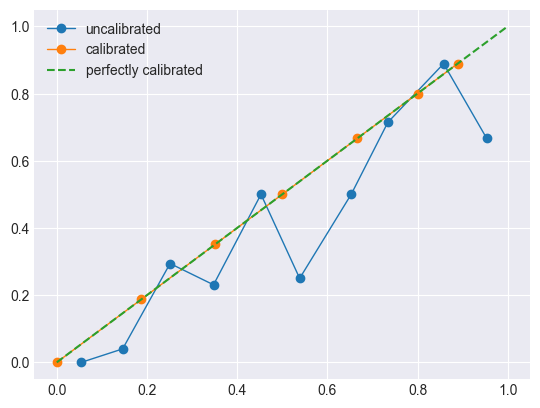

In [132]:

from sklearn.calibration import CalibratedClassifierCV, calibration_curve
isotonic = CalibratedClassifierCV(logreg, cv='prefit', method='isotonic')
isotonic.fit(X_val_stand, y_val)

y_val_pred_prob_c = isotonic.predict_proba(X_val_stand)
fop, mpv = calibration_curve(y_val,y_pred_val_prob[:,1],n_bins=10)
fop_c, mpv_c = calibration_curve(y_val,y_val_pred_prob_c[:,1],n_bins=10)
plt.plot(mpv,fop, marker='o', linewidth=1, label='uncalibrated')
plt.plot(mpv_c,fop_c, marker='o', linewidth=1, label='calibrated')
plt.plot([0,1],[0,1],linestyle='--', label='perfectly calibrated')
plt.legend()
plt.show()

3. Construct the classification report for the calibrated model

In [133]:
y_pred = logreg.predict(X_val_stand)
y_pred_c = isotonic.predict(X_val_stand)

print(classification_report(y_val, y_pred))
print(classification_report(y_val, y_pred_c))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86        90
           1       0.61      0.58      0.59        33

    accuracy                           0.79       123
   macro avg       0.73      0.72      0.73       123
weighted avg       0.78      0.79      0.79       123

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        90
           1       0.80      0.48      0.60        33

    accuracy                           0.83       123
   macro avg       0.82      0.72      0.75       123
weighted avg       0.83      0.83      0.81       123



4. Fit and calibrate the model at the same time.

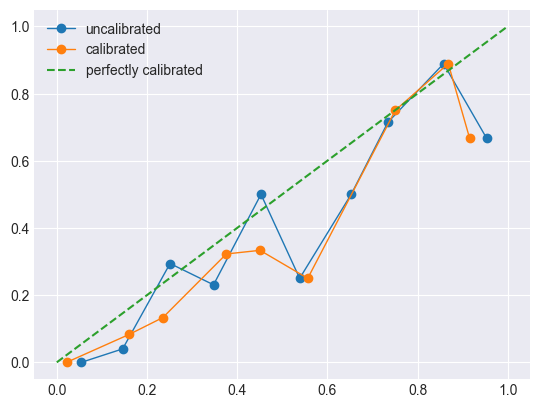

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        90
           1       0.80      0.48      0.60        33

    accuracy                           0.83       123
   macro avg       0.82      0.72      0.75       123
weighted avg       0.83      0.83      0.81       123

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        90
           1       0.64      0.55      0.59        33

    accuracy                           0.80       123
   macro avg       0.74      0.72      0.73       123
weighted avg       0.79      0.80      0.79       123



In [134]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
logreg2 = LogisticRegression(C=10000, max_iter=1000) 
isotonic2 = CalibratedClassifierCV(logreg2, cv=3, method='isotonic')
isotonic2.fit(X_train_stand, y_train)


# The calibration plot
y_val_pred_prob_c2 = isotonic2.predict_proba(X_val_stand)

fop, mpv = calibration_curve(y_val,y_pred_val_prob[:,1],n_bins=10)
fop_c, mpv_c = calibration_curve(y_val,y_val_pred_prob_c2[:,1],n_bins=10)

plt.plot(mpv,fop, marker='o', linewidth=1, label='uncalibrated')
plt.plot(mpv_c,fop_c, marker='o', linewidth=1, label='calibrated')
plt.plot([0,1],[0,1],linestyle='--', label='perfectly calibrated')
plt.legend()
plt.show()

y_pred_c2 = isotonic2.predict(X_val_stand)
print(classification_report(y_val, y_pred_c))
print(classification_report(y_val, y_pred_c2))

### 3.3 Adding polynomials and penalisation
1. Design  some polynomial features, with degree 1 (This does not make any sense, because it will just return the original dataset, but using degree 2 makes the computation time why to high to be able to do it during class. This way, you at least get to practice the code).
2. Perform a RandomizedSearch on the logistic regression
    + let parameter C deviate from 0.0001 to 10, with 1000 options
    + Use cv=3 and random_state=1234
    + Ask the Randomized search to fit 100 models
3. Find out which value of C gives the best model
4. Make a scatterplot of the accuracy vs the values of C
5. Do a grid search, but also do a calibration at the same time.
    + Fit 50 models
    + Base the range of C you will include in the grid search on the scatterplot from question 4
6. Evaluate the final model
    + Look at the classification report
    + Draw the ROC-curve
    + Does it perform better than the plain logistic model?

1. Design the polynomial features 

In [135]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train_stand)
X_trainval_poly = poly.transform(X_trainval_stand)
X_val_poly = poly.transform(X_val_stand)


2. Do the RandomizedSearch

In [136]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

C = [round(x,5) for x in np.linspace(start = 0.0001, stop = 10, num = 1000)]
random_grid = {'C': C}
# The object to fit the model
logreg = LogisticRegression( max_iter=1000) 

# object for the randomised search
log_random = RandomizedSearchCV(estimator = logreg, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2,  n_jobs=-1, random_state=1234)

#Fitting model (model+ calibration)
log_random.fit(X_train_poly, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.01011, 0.02012, 0.03013,
                                              0.04014, 0.05015, 0.06016,
                                              0.07017, 0.08018, 0.09019, 0.1002,
                                              0.11021, 0.12022, 0.13023,
                                              0.14024, 0.15025, 0.16026,
                                              0.17027, 0.18028, 0.19029, 0.2003,
                                              0.21031, 0.22032, 0.23033,
                                              0.24034, 0.25035, 0.26036,
                                              0.27037, 0.28038, 0.29039, ...]},
                   random_state=1234, verbose=2)

3. Look at the parameters of the best model 

In [137]:
log_random.best_params_

{'C': 6.81685}

4. Make a scatterplot of the accuracy vs the C-parameter

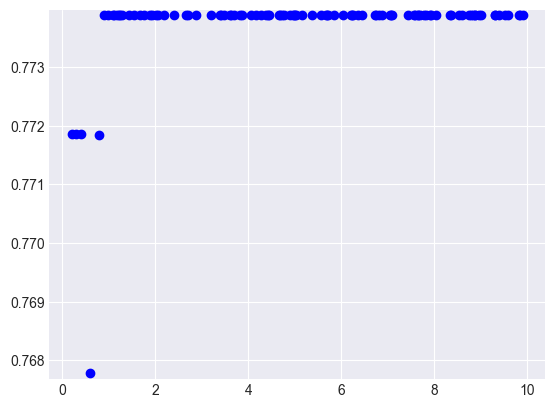

In [138]:
out2 = pd.DataFrame(log_random.cv_results_)
plt.ylim(out2['mean_test_score'].min()-0.0001, out2['mean_test_score'].max()+0.0001)
plt.scatter(out2['param_C'], out2['mean_test_score'], c='blue');


5. Grid search

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer

prec_scorer = make_scorer(metrics.accuracy_score)
# other possibilities are metrics.recall_score, metrics.average_precision, ...

C = [x for x in np.linspace(start = 0.0001, stop = 1, num = 50)]

random_grid = {'C': C}

# The object to fit the model
logreg_balanced = LogisticRegression( max_iter=1000) 

# object for the randomised search
log_grid = GridSearchCV(estimator = logreg_balanced, param_grid = random_grid,
                                scoring=prec_scorer  , cv = 3, verbose=2,  n_jobs=-1)
isotonic_log = CalibratedClassifierCV(log_grid, cv=3, method='isotonic')

#Fitting model (model+ calibration)
isotonic_log.fit(X_train_poly, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits


CalibratedClassifierCV(base_estimator=GridSearchCV(cv=3,
                                                   estimator=LogisticRegression(max_iter=1000),
                                                   n_jobs=-1,
                                                   param_grid={'C': [0.0001,
                                                                     0.02050612244897959,
                                                                     0.04091224489795919,
                                                                     0.06131836734693878,
                                                                     0.08172448979591837,
                                                                     0.10213061224489796,
                                                                     0.12253673469387756,
                                                                     0.14294285714285712,
                                                                     0.1633489

6. Evaluation

In [140]:
isotonic_log.score(X_val_poly, y_val)

0.7723577235772358

In [141]:
y_pred_poly = isotonic_log.predict(X_val_poly)
print(classification_report(y_val, y_pred_poly))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        90
           1       0.58      0.55      0.56        33

    accuracy                           0.77       123
   macro avg       0.71      0.70      0.70       123
weighted avg       0.77      0.77      0.77       123



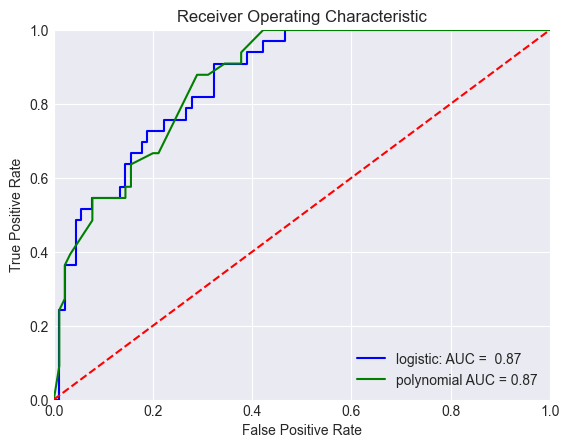

In [142]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = y_val_pred_prob[:,1]
preds_poly = isotonic_log.predict_proba(X_val_poly)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Part 2: Labo class 6: Classification: knn - gbm - svm

# 1. knn
1. Perform a grid search, with the number of neighbours ranging from 1 to 30.
2. Evaluate the best model
3. The data is slightly unbalanced. Do hybrid sampling
    + To oversample, use smote, with sampling_strategy=0.8
    + To undersample, use RandomUnderSampler,  with sampling_strategy=1

4. Redo the grid search, on the balanced data, but also calibrate the model at the same time. You can determine the range of values you include in the grid search based on the results of the first grid search.
5. Evaluate this model

1. Perform knn

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
n_neighbors = np.arange(1,30)
param_grid = {'n_neighbors': n_neighbors}
knn = KNeighborsClassifier( )
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, scoring=prec_scorer ,cv = 3,  verbose=2, n_jobs = -1)
grid_search.fit(X_train_stand, y_train)
grid_search.best_params_

Fitting 3 folds for each of 29 candidates, totalling 87 fits


{'n_neighbors': 12}

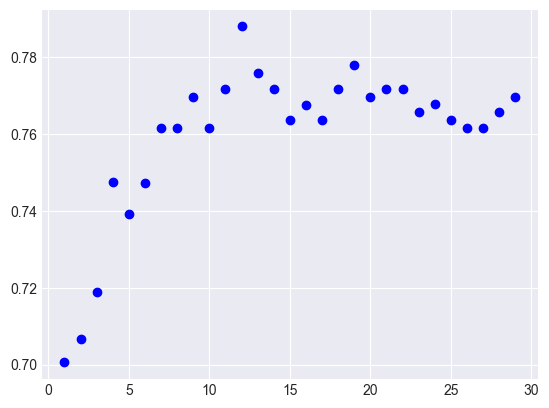

In [144]:
out2 = pd.DataFrame(grid_search.cv_results_)
xlabel_names = ['n_neighbors']
plt.scatter(out2['param_n_neighbors'], out2['mean_test_score'], c='blue');


2. Evaluate

In [145]:
y_pred_knn = grid_search.predict(X_val_stand)
print(classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        90
           1       0.65      0.39      0.49        33

    accuracy                           0.78       123
   macro avg       0.73      0.66      0.68       123
weighted avg       0.76      0.78      0.76       123



c:\Users\Kelvi\.virtualenvs\SchoolProject-DqLAKyTx\Lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


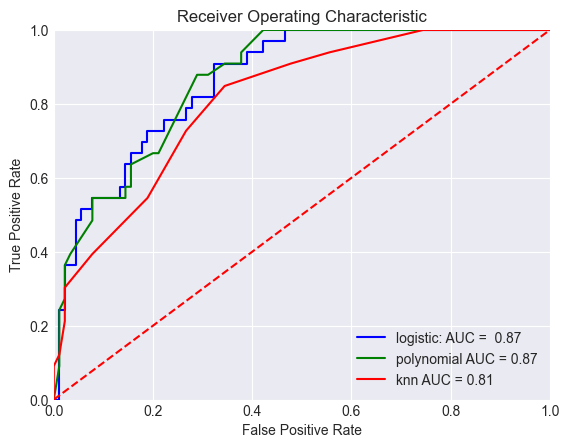

In [146]:
preds = y_val_pred_prob[:,1]
preds_poly = isotonic_log.predict_proba(X_val_poly)[:,1]
preds_knn = grid_search.predict_proba(X_val_stand)[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)
fpr_k, tpr_k, threshold = metrics.roc_curve(y_val, preds_knn)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)
roc_auc_k = metrics.auc(fpr_k, tpr_k)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)
plt.plot(fpr_k, tpr_k, 'r', label = 'knn AUC = %0.2f' % roc_auc_k)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

3. Deal with the unbalance

In [147]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.8, random_state=1703)
under = RandomUnderSampler(sampling_strategy=1)
pipeline = Pipeline([('o', over), ('u', under)])

X_train_smote, y_train_smote = pipeline.fit_resample(X_train_stand.copy(), y_train.copy())
X_val_smote, y_val_smote = pipeline.fit_resample(X_trainval_stand.copy(), y_trainval.copy())
np.bincount(y_val_smote)

array([321, 321], dtype=int64)

4. Redo the grid search, but on the balanced data and calibrate the model

In [148]:
n_neighbors = np.arange(1,5)
param_grid = {'n_neighbors': n_neighbors}

knn_b = KNeighborsClassifier( )
grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid, scoring=prec_scorer ,cv = 3,  verbose=2, n_jobs = -1)
isotonic_knn = CalibratedClassifierCV(grid_search_knn, cv=3, method='isotonic')


isotonic_knn.fit(X_train_smote, y_train_smote)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits


CalibratedClassifierCV(base_estimator=GridSearchCV(cv=3,
                                                   estimator=KNeighborsClassifier(),
                                                   n_jobs=-1,
                                                   param_grid={'n_neighbors': array([1, 2, 3, 4])},
                                                   scoring=make_scorer(accuracy_score),
                                                   verbose=2),
                       cv=3, method='isotonic')

5. Re-evaluate

In [149]:
y_pred_knn_b = isotonic_knn.predict(X_val_stand)
print(classification_report(y_val, y_pred_knn_b))

              precision    recall  f1-score   support

           0       0.82      0.73      0.78        90
           1       0.44      0.58      0.50        33

    accuracy                           0.69       123
   macro avg       0.63      0.65      0.64       123
weighted avg       0.72      0.69      0.70       123



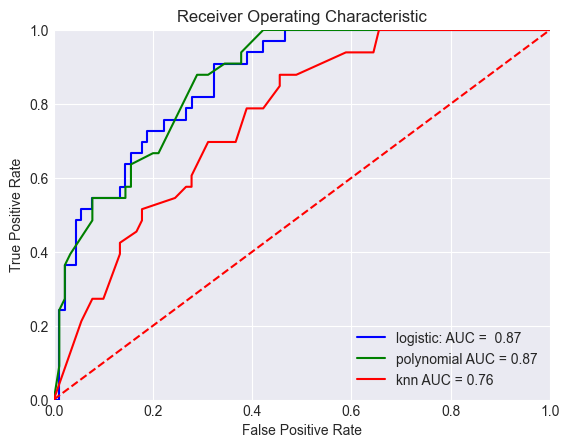

In [150]:
preds_knn_b = isotonic_knn.predict_proba(X_val_stand)[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)
fpr_k, tpr_k, threshold = metrics.roc_curve(y_val, preds_knn_b)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)
roc_auc_k = metrics.auc(fpr_k, tpr_k)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)
plt.plot(fpr_k, tpr_k, 'r', label = 'knn AUC = %0.2f' % roc_auc_k)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 2. GBM
1. Perform a Randomized search. Use the following parameters
    + n_etimators: 50 values between 100 and 250
    + max_features: 'auto', 'sqrt', 'log2'
    + max_depth: 10 values between 1 and 10
    + min_samples_split: 9 values between 2 and 10
    + min_samples_leaf: 10 values between 1 and 10
    + learning_rate: 50 values between 0.001 and 1.5
    +  Use 3 folds and do 50 fits.
    + Use the balanced dataset
2. Evaluate the best model
3. Look at the scatterplots for the parameters
4. Do a grid search. Use the scatterplots to determine the parameters. Also perform the calibration at the same time.
5. Evaluate the best model model

1. Randomized search

In [151]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 100, stop = 250, num = 50)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [int(x) for x in np.linspace(2, 10, num = 9)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
learning_rate = [round(x,5) for x in np.linspace(start = 0.001, stop = 1.5, num = 50)]

random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
gbm = GradientBoostingClassifier()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=4872, n_jobs = -1)
gbm_random.fit(X_train_smote, y_train_smote)
gbm_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'n_estimators': 155,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 10,
 'learning_rate': 0.12337}

2. Evaluate

In [152]:
y_pred_gbm = gbm_random.predict(X_val_stand)
print(classification_report(y_val, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83        90
           1       0.55      0.82      0.66        33

    accuracy                           0.77       123
   macro avg       0.73      0.79      0.74       123
weighted avg       0.82      0.77      0.78       123



3. scatterplot

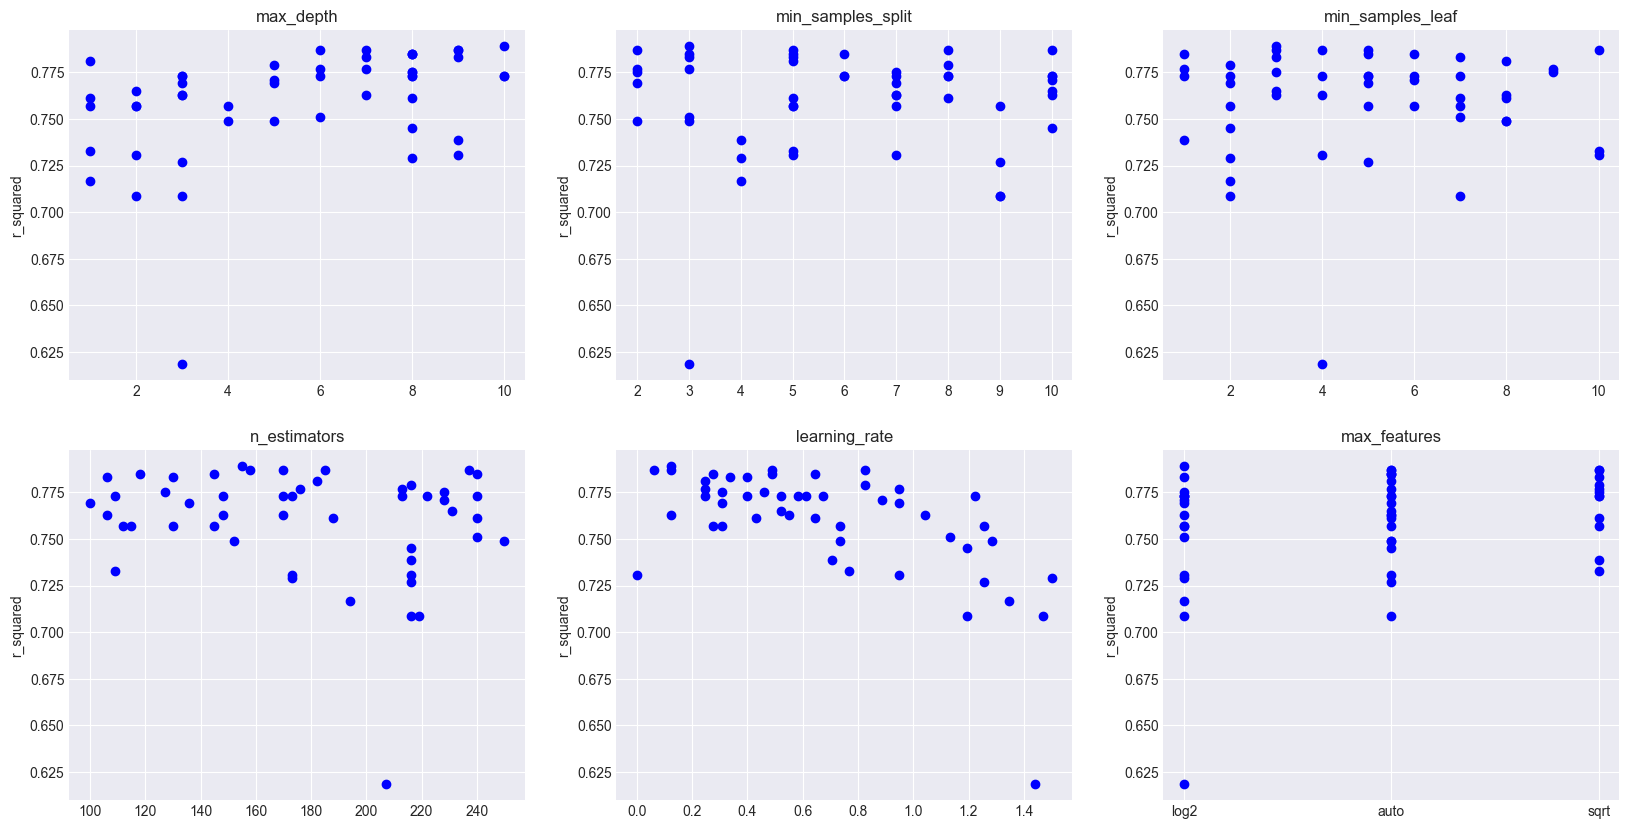

In [153]:
out2 = pd.DataFrame(gbm_random.cv_results_)

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_learning_rate','param_max_features']

fig, axs = plt.subplots(2,3, figsize=(20,10))

axs[0,0].scatter(out2['param_max_depth'], out2['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out2['param_min_samples_split'], out2['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out2['param_min_samples_leaf'], out2['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out2['param_n_estimators'], out2['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out2['param_learning_rate'], out2['mean_test_score'], c='blue');
axs[1,1].set_title('learning_rate')

axs[1,2].scatter(out2['param_max_features'], out2['mean_test_score'], c='blue');
axs[1,2].set_title('max_features')

for ax in axs.flat: ax.set(ylabel='r_squared')

4. Grid search and calibration

In [154]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
# int(x) for x in np.linspace(150, 160, num = 3)
n_estimators = [170,188,136]
# x for x in np.linspace(0.1, 0.2, num = 3)
learning_rate = [0.82698,0.42929,0.94935]
max_features = ['sqrt']
max_depth = [6,5,1]
min_samples_split = [10,5,2]
min_samples_leaf = [3,7,2]
                                            
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
gbm = GradientBoostingClassifier()
gbm_grid = GridSearchCV(estimator = gbm, param_grid = random_grid,  cv = 3, verbose=2,  n_jobs = -1)

isotonic_gbm = CalibratedClassifierCV(gbm_grid, cv=3, method='isotonic')
isotonic_gbm.fit(X_train_smote, y_train_smote)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits


CalibratedClassifierCV(base_estimator=GridSearchCV(cv=3,
                                                   estimator=GradientBoostingClassifier(),
                                                   n_jobs=-1,
                                                   param_grid={'learning_rate': [0.82698,
                                                                                 0.42929,
                                                                                 0.94935],
                                                               'max_depth': [6,
                                                                             5,
                                                                             1],
                                                               'max_features': ['sqrt'],
                                                               'min_samples_leaf': [3,
                                                                                    7,
               

5. evaluate

In [155]:
y_pred_gbm = isotonic_gbm.predict(X_val_stand)
print(classification_report(y_val, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.93      0.74      0.83        90
           1       0.55      0.85      0.67        33

    accuracy                           0.77       123
   macro avg       0.74      0.80      0.75       123
weighted avg       0.83      0.77      0.78       123



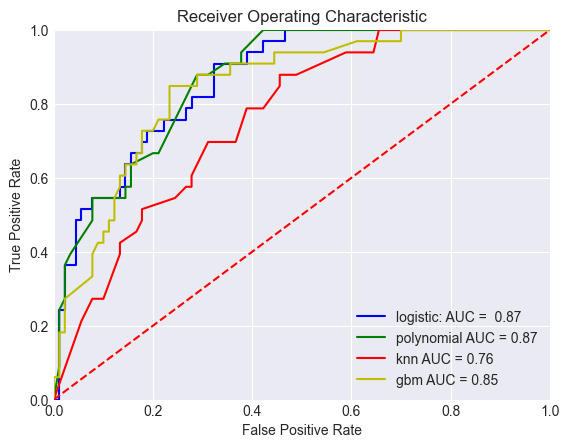

In [156]:
preds_gbm = isotonic_gbm.predict_proba(X_val_stand)[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)
fpr_k, tpr_k, threshold = metrics.roc_curve(y_val, preds_knn_b)
fpr_g, tpr_g, threshold = metrics.roc_curve(y_val, preds_gbm)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)
roc_auc_k = metrics.auc(fpr_k, tpr_k)
roc_auc_g = metrics.auc(fpr_g, tpr_g)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)
plt.plot(fpr_k, tpr_k, 'r', label = 'knn AUC = %0.2f' % roc_auc_k)
plt.plot(fpr_g, tpr_g, 'y', label = 'gbm AUC = %0.2f' % roc_auc_g)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 3. Support vector machines
1. Perform a Randomized search. Use the following parameters
    + C: 50 values between 0.001 and 50
    + kernel: 'linear', 'poly', 'rbf', 'sigmoid'
    + degree: 15 values between 1 and 15
    + gamma: 50 values between 0.001 and 50
    +  Use 3 folds and do 50 fits.
    + Use the balanced dataset
2. Evaluate the best model
3. Look at the scatterplots for the parameters
4. Do a grid search. Use the scatterplots to determine the parameters. Also perform the calibration at the same time.
5. Evaluate the best model model

1. Randomized search

In [157]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

C = [round(x,5) for x in np.linspace(start = 0.001, stop = 5, num = 50)]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [round(x) for x in np.linspace(start = 1, stop = 5, num = 15)]
gamma = [round(x,5) for x in np.linspace(start = 0.001, stop = 1, num = 50)]
#gamma = ['auto', 0.3,0.5, 0.7,0.9]

random_grid = {'C': C,
               'kernel': kernel,
               'degree':degree,
               'gamma': gamma}
svc = SVC()
svc_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter =50, cv = 3, verbose=2, random_state=4872, n_jobs = -1)
svc_random.fit(X_train_smote, y_train_smote)

print(svc_random.best_params_)
params = svc_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'kernel': 'rbf', 'gamma': 0.65341, 'degree': 4, 'C': 2.24545}


2. Evaluate

In [158]:
from sklearn.metrics import classification_report

y_pred_svm = svc_random.predict(X_val_stand)
print(classification_report(y_val, y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        90
           1       0.47      0.58      0.52        33

    accuracy                           0.72       123
   macro avg       0.65      0.67      0.66       123
weighted avg       0.74      0.72      0.72       123



3. Scatter plots

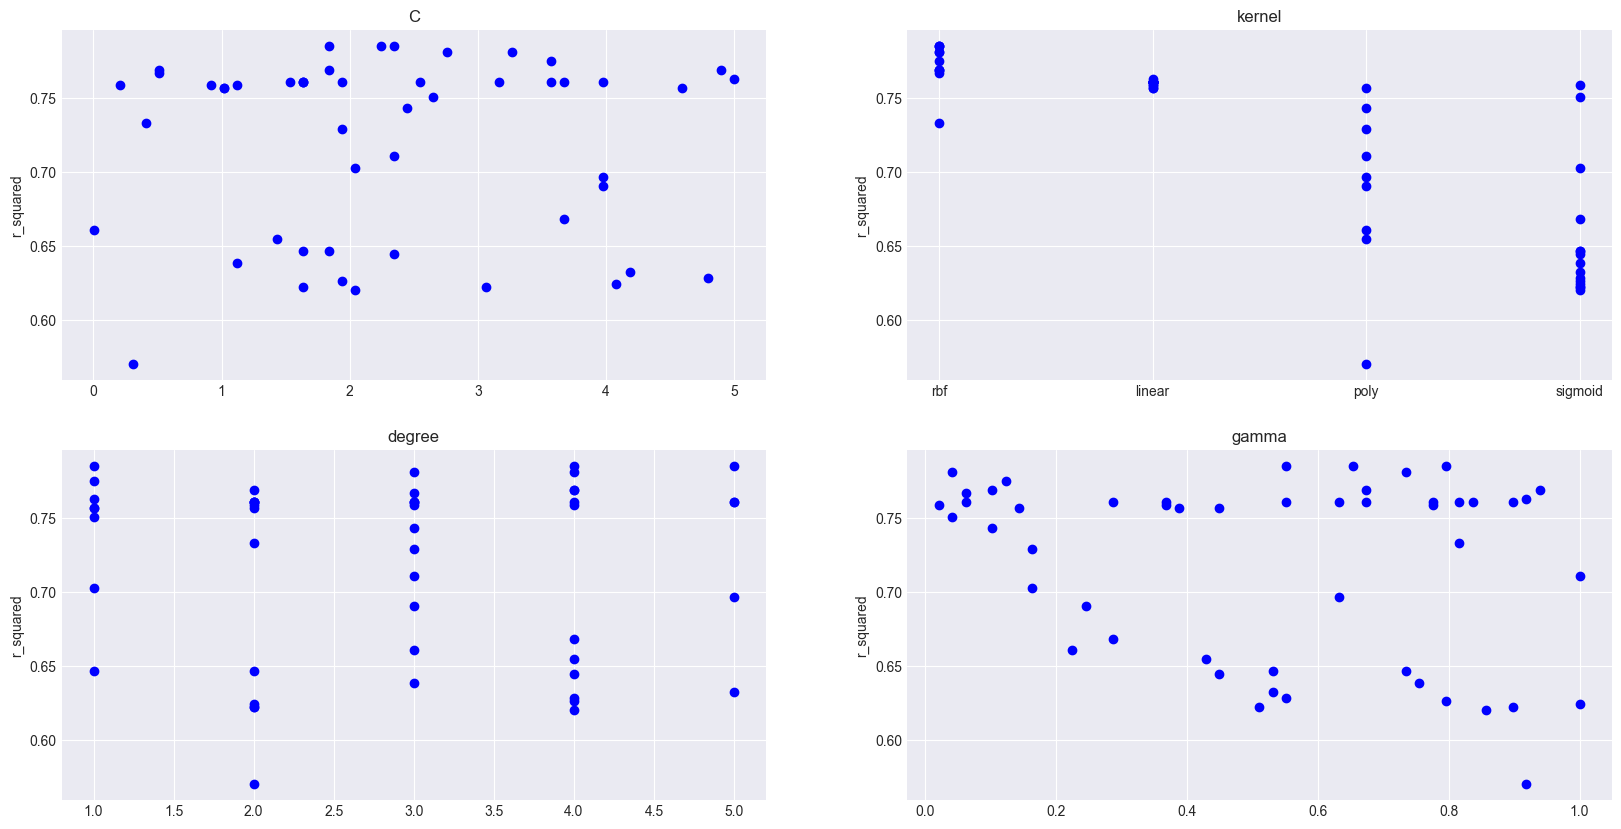

In [159]:
out2 = pd.DataFrame(svc_random.cv_results_)

xlabel_names = ['C',
               'kernel',
               'degree',
               'gamma']

fig, axs = plt.subplots(2,2, figsize=(20,10))

axs[0,0].scatter(out2['param_C'], out2['mean_test_score'], c='blue');
axs[0,0].set_title('C')

axs[0,1].scatter(out2['param_kernel'], out2['mean_test_score'], c='blue');
axs[0,1].set_title('kernel')

axs[1,0].scatter(out2['param_degree'], out2['mean_test_score'], c='blue');
axs[1,0].set_title('degree')

axs[1,1].scatter(out2['param_gamma'], out2['mean_test_score'], c='blue');
axs[1,1].set_title('gamma')

for ax in axs.flat: ax.set(ylabel='r_squared')

4. Grid search + calibration

In [160]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV, calibration_curve


C = [round(x,5) for x in np.linspace(start = 3, stop = 3.5, num = 5)]
kernel = [ 'rbf']
degree = [3,4,1]
gamma = [round(x,5) for x in np.linspace(start = 0.01, stop = 0.2, num = 4)]

random_grid = {'C': C,
               'kernel': kernel,
               'degree':degree,
               'gamma': gamma}
svc = SVC()
svc_grid = GridSearchCV(estimator = svc, param_grid = random_grid,  cv = 3, verbose=2,  n_jobs = -1)

isotonic_svm = CalibratedClassifierCV(svc_grid, cv=3, method='isotonic')
isotonic_svm.fit(X_train_smote, y_train_smote)



Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits


CalibratedClassifierCV(base_estimator=GridSearchCV(cv=3, estimator=SVC(),
                                                   n_jobs=-1,
                                                   param_grid={'C': [3.0, 3.125,
                                                                     3.25,
                                                                     3.375,
                                                                     3.5],
                                                               'degree': [3, 4,
                                                                          1],
                                                               'gamma': [0.01,
                                                                         0.07333,
                                                                         0.13667,
                                                                         0.2],
                                                               'kernel': ['rb

5. Evaluate

In [161]:
y_pred_svm = isotonic_svm.predict(X_val_stand)
print(classification_report(y_val, y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        90
           1       0.51      0.79      0.62        33

    accuracy                           0.74       123
   macro avg       0.71      0.76      0.71       123
weighted avg       0.80      0.74      0.75       123



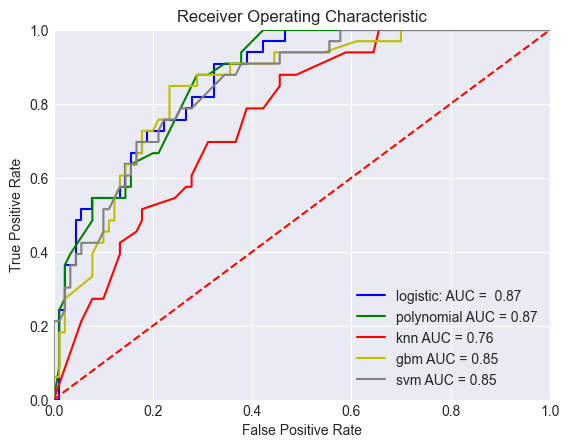

In [162]:
preds_svm = isotonic_svm.predict_proba(X_val_stand)[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)
fpr_k, tpr_k, threshold = metrics.roc_curve(y_val, preds_knn_b)
fpr_g, tpr_g, threshold = metrics.roc_curve(y_val, preds_gbm)
fpr_s, tpr_s, threshold = metrics.roc_curve(y_val, preds_svm)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)
roc_auc_k = metrics.auc(fpr_k, tpr_k)
roc_auc_g = metrics.auc(fpr_g, tpr_g)
roc_auc_s = metrics.auc(fpr_s, tpr_s)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)
plt.plot(fpr_k, tpr_k, 'r', label = 'knn AUC = %0.2f' % roc_auc_k)
plt.plot(fpr_g, tpr_g, 'y', label = 'gbm AUC = %0.2f' % roc_auc_g)
plt.plot(fpr_s, tpr_s, 'grey', label = 'svm AUC = %0.2f' % roc_auc_s)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Retrain Best Model

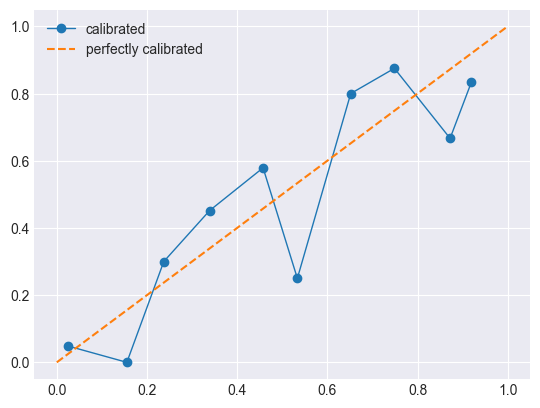

In [163]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
final_logreg = LogisticRegression(C=10000, max_iter=1000) 
final_isotonic = CalibratedClassifierCV(final_logreg, cv=3, method='isotonic')
final_isotonic.fit(X_trainval_stand, y_trainval)


# The calibration plot
final_y_test_pred_prob = final_isotonic.predict_proba(X_test_stand)

# fop, mpv = calibration_curve(y_test,y_pred_val_prob[:,1],n_bins=10)
fop_c, mpv_c = calibration_curve(y_test,final_y_test_pred_prob[:,1],n_bins=10)

# plt.plot(mpv,fop, marker='o', linewidth=1, label='uncalibrated')
plt.plot(mpv_c,fop_c, marker='o', linewidth=1, label='calibrated')
plt.plot([0,1],[0,1],linestyle='--', label='perfectly calibrated')
plt.legend()
plt.show()



### Classification Report

In [164]:
final_y_pred = final_isotonic.predict(X_test_stand)
# print(classification_report(y_test, y_pred_c))
print(classification_report(y_test, final_y_pred))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81        98
           1       0.72      0.41      0.52        56

    accuracy                           0.73       154
   macro avg       0.72      0.66      0.67       154
weighted avg       0.73      0.73      0.70       154



In [169]:
final_fpr, final_tpr, final_threshold = metrics.roc_curve(y_test, final_y_test_pred_prob[:,1])
final_roc_auc = metrics.auc(final_fpr, final_tpr)
print('Final score: ' + str(final_roc_auc))

Final score: 0.8252551020408163
